In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct,ExpSineSquared, WhiteKernel, RBF, ConstantKernel 
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score

In [2]:
import math
def computeCorrelation(X,Y):
    xBar = np.mean(X)
    yBar = np.mean(Y)
    SSR = 0
    varX = 0  
    varY = 0   
    for i in range(0, len(X)):
        diffXXBar = X[i]-xBar
        diffYYBar = Y[i]-yBar
        SSR += (diffXXBar * diffYYBar)
        varX += diffXXBar**2
        varY += diffYYBar**2

    SST = math.sqrt(varX*varY)
    return SSR/SST

# On original dataset

In [12]:
data = pd.read_csv('originaldata.csv')
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X = np.array(X)
Y = np.array(Y)

loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

ypre = []
yvar = []

KErnel = 1 * RBF() 

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = GaussianProcessRegressor(kernel=KErnel,alpha=3.,n_restarts_optimizer=100,
         random_state=0).fit(X_train,y_train)
    y_pre = model.predict(X_test ,return_std=True)[0]
    y_var = model.predict(X_test ,return_std=True)[1]
 
    ypre.append(y_pre[0])
    yvar.append(3*y_var[0])

computeCorrelation(Y,ypre)


LeaveOneOut()
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [3]
TRAIN: [ 0  1  2  3  5

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [34]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [35]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [36]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [37]
TRAIN: [ 0  1  2  3  4  5  6  7 

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73] TEST: [68]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73] TEST: [69]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73] TEST: [70]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73] TEST: [71]
TRAIN: [ 0  1  2  3  4  5  6  7 

0.44245793561103075

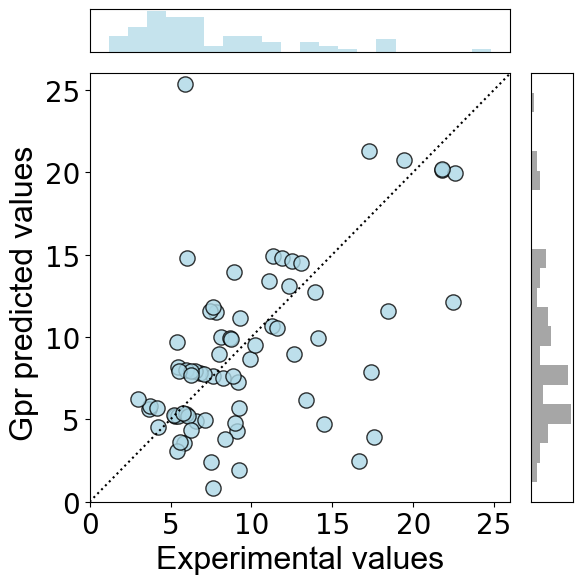

In [13]:

font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 23,
}

fig = plt.figure(figsize=[6,6])
ax1 = plt.subplot()
ax1.plot([0, 26], [0, 26],"k:",)
ax1.set_ylabel("Gpr predicted values ",font2)
ax1.set_xlabel("Experimental values",font2)
ax1.set_ylim([0, 26])
ax1.set_xlim([0, 26])
# plt.title('CV=LOOV | R=0.44',fontsize=20)

plt.scatter(Y,ypre,marker='o',c='lightblue',s=120,edgecolors='k',alpha=0.8,)



# Create histograms for x-dimension source and target data on the top side
ax_top = ax1.inset_axes([0, 1.05, 1, 0.1])
ax_top.hist(Y, bins=20, color='lightblue', alpha=0.7, density=True)
ax_top.set_xticks([])
ax_top.set_yticks([])

# Create histograms for y-dimension source and target data on the right side
ax_right = ax1.inset_axes([1.05, 0, 0.1, 1])
ax_right.hist(ypre, bins=20, orientation='horizontal', color='grey', alpha=0.7, density=True)
ax_right.set_xticks([])
ax_right.set_yticks([])
ax1.set_xticks(np.arange(0, 26, 5)) 
ax1.set_yticks(np.arange(0, 26, 5))

plt.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('orires.png', dpi=800)
plt.savefig('orires.svg', dpi=800)

# RF

LeaveOneOut()
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [3]
TRAIN: [ 0  1  2  3  5

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [34]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [35]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [36]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [37]
TRAIN: [ 0  1  2  3  4  5  6  7 

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 72
 73] TEST: [69]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72
 73] TEST: [70]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 72
 73] TEST: [71]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 73] TEST: [72]
TRAIN: [ 0  1  2  3  4  5  6  7 

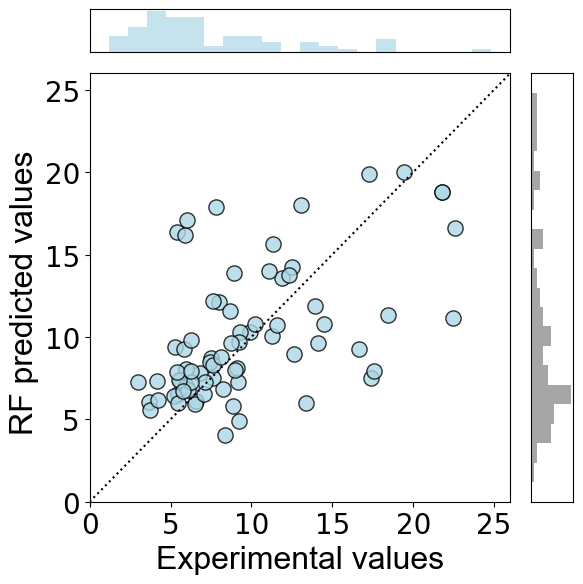

In [22]:
data = pd.read_csv('originaldata.csv')
model_name = "FR"
from sklearn.ensemble import RandomForestRegressor


X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X = np.array(X)
Y = np.array(Y)

loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

ypre = []



for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = RandomForestRegressor().fit(X_train,y_train)
    y_pre = model.predict(X_test )

 
    ypre.append(y_pre[0])

print('\n')
print(computeCorrelation(Y,ypre))
print('\n')





font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 23,
}

fig = plt.figure(figsize=[6,6])
ax1 = plt.subplot()
ax1.plot([0, 26], [0, 26],"k:",)
ax1.set_ylabel("RF predicted values ",font2)
ax1.set_xlabel("Experimental values",font2)
ax1.set_ylim([0, 26])
ax1.set_xlim([0, 26])
# plt.title('CV=LOOV | R=0.44',fontsize=20)

plt.scatter(Y,ypre,marker='o',c='lightblue',s=120,edgecolors='k',alpha=0.8,)



# Create histograms for x-dimension source and target data on the top side
ax_top = ax1.inset_axes([0, 1.05, 1, 0.1])
ax_top.hist(Y, bins=20, color='lightblue', alpha=0.7, density=True)
ax_top.set_xticks([])
ax_top.set_yticks([])

# Create histograms for y-dimension source and target data on the right side
ax_right = ax1.inset_axes([1.05, 0, 0.1, 1])
ax_right.hist(np.array(ypre), bins=20, orientation='horizontal', color='grey', alpha=0.7, density=True)
ax_right.set_xticks([])
ax_right.set_yticks([])
ax1.set_xticks(np.arange(0, 26, 5)) 
ax1.set_yticks(np.arange(0, 26, 5))

plt.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('orires{}.png'.format(model_name), dpi=800)
plt.savefig('orires{}.svg'.format(model_name), dpi=800)


# MLP

LeaveOneOut()
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [3]
TRAIN: [ 0  1  2  3  5

/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacob/miniconda3/lib/python3.

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [22]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [23]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [24]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [25]
TRAIN: [ 0  1  2  3  4  5  6  7 

/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacob/miniconda3/lib/python3.

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [49]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [50]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [51]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [52]
TRAIN: [ 0  1  2  3  4  5  6  7 

/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


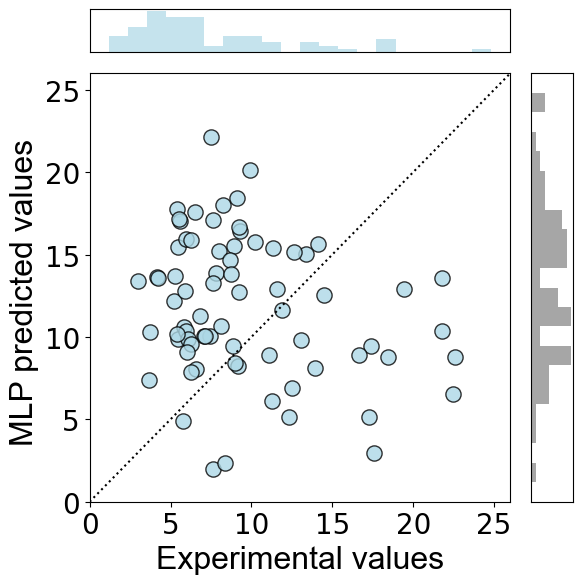

In [15]:
data = pd.read_csv('originaldata.csv')
model_name = "MLP"
from sklearn.neural_network import MLPRegressor


X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X = np.array(X)
Y = np.array(Y)

loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

ypre = []



for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = MLPRegressor().fit(X_train,y_train)
    y_pre = model.predict(X_test )

 
    ypre.append(y_pre[0])

print('\n')
print(computeCorrelation(Y,ypre))
print('\n')





font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 23,
}

fig = plt.figure(figsize=[6,6])
ax1 = plt.subplot()
ax1.plot([0, 26], [0, 26],"k:",)
ax1.set_ylabel("MLP predicted values ",font2)
ax1.set_xlabel("Experimental values",font2)
ax1.set_ylim([0, 26])
ax1.set_xlim([0, 26])
# plt.title('CV=LOOV | R=0.44',fontsize=20)

plt.scatter(Y,ypre,marker='o',c='lightblue',s=120,edgecolors='k',alpha=0.8,)



# Create histograms for x-dimension source and target data on the top side
ax_top = ax1.inset_axes([0, 1.05, 1, 0.1])
ax_top.hist(Y, bins=20, color='lightblue', alpha=0.7, density=True)
ax_top.set_xticks([])
ax_top.set_yticks([])

# Create histograms for y-dimension source and target data on the right side
ax_right = ax1.inset_axes([1.05, 0, 0.1, 1])
ax_right.hist(-np.array(ypre), bins=20, orientation='horizontal', color='grey', alpha=0.7, density=True)
ax_right.set_xticks([])
ax_right.set_yticks([])
ax1.set_xticks(np.arange(0, 26, 5)) 
ax1.set_yticks(np.arange(0, 26, 5))

plt.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('orires{}.png'.format(model_name), dpi=800)
plt.savefig('orires{}.svg'.format(model_name), dpi=800)


# SVR

LeaveOneOut()
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [3]
TRAIN: [ 0  1  2  3  5

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [55]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [56]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [57]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [58]
TRAIN: [ 0  1  2  3  4  5  6  7 

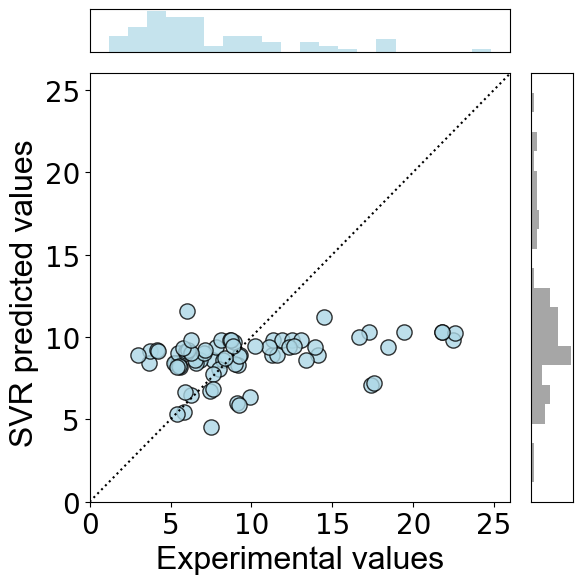

In [16]:
data = pd.read_csv('originaldata.csv')
model_name = "SVR"
from sklearn.svm import SVR


X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X = np.array(X)
Y = np.array(Y)

loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

ypre = []



for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = SVR(kernel='linear',).fit(X_train,y_train)
    y_pre = model.predict(X_test )

 
    ypre.append(y_pre[0])

print('\n')
print(computeCorrelation(Y,ypre))
print('\n')





font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 23,
}

fig = plt.figure(figsize=[6,6])
ax1 = plt.subplot()
ax1.plot([0, 26], [0, 26],"k:",)
ax1.set_ylabel("SVR predicted values ",font2)
ax1.set_xlabel("Experimental values",font2)
ax1.set_ylim([0, 26])
ax1.set_xlim([0, 26])
# plt.title('CV=LOOV | R=0.44',fontsize=20)

plt.scatter(Y,ypre,marker='o',c='lightblue',s=120,edgecolors='k',alpha=0.8,)



# Create histograms for x-dimension source and target data on the top side
ax_top = ax1.inset_axes([0, 1.05, 1, 0.1])
ax_top.hist(Y, bins=20, color='lightblue', alpha=0.7, density=True)
ax_top.set_xticks([])
ax_top.set_yticks([])

# Create histograms for y-dimension source and target data on the right side
ax_right = ax1.inset_axes([1.05, 0, 0.1, 1])
ax_right.hist(-np.array(ypre), bins=20, orientation='horizontal', color='grey', alpha=0.7, density=True)
ax_right.set_xticks([])
ax_right.set_yticks([])
ax1.set_xticks(np.arange(0, 26, 5)) 
ax1.set_yticks(np.arange(0, 26, 5))

plt.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('orires{}.png'.format(model_name), dpi=800)
plt.savefig('orires{}.svg'.format(model_name), dpi=800)


# Adaboost

LeaveOneOut()
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [3]
TRAIN: [ 0  1  2  3  5

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [41]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [42]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [43]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73] TEST: [44]
TRAIN: [ 0  1  2  3  4  5  6  7 

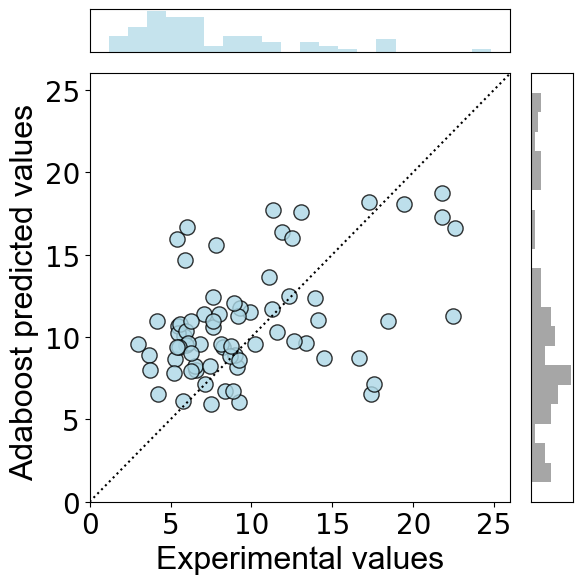

In [18]:
data = pd.read_csv('originaldata.csv')
model_name = "ADA"
from sklearn.ensemble import AdaBoostRegressor


X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X = np.array(X)
Y = np.array(Y)

loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

ypre = []



for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = AdaBoostRegressor().fit(X_train,y_train)
    y_pre = model.predict(X_test )

 
    ypre.append(y_pre[0])

print('\n')
print(computeCorrelation(Y,ypre))
print('\n')





font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 23,
}

fig = plt.figure(figsize=[6,6])
ax1 = plt.subplot()
ax1.plot([0, 26], [0, 26],"k:",)
ax1.set_ylabel("Adaboost predicted values ",font2)
ax1.set_xlabel("Experimental values",font2)
ax1.set_ylim([0, 26])
ax1.set_xlim([0, 26])
# plt.title('CV=LOOV | R=0.44',fontsize=20)

plt.scatter(Y,ypre,marker='o',c='lightblue',s=120,edgecolors='k',alpha=0.8,)



# Create histograms for x-dimension source and target data on the top side
ax_top = ax1.inset_axes([0, 1.05, 1, 0.1])
ax_top.hist(Y, bins=20, color='lightblue', alpha=0.7, density=True)
ax_top.set_xticks([])
ax_top.set_yticks([])

# Create histograms for y-dimension source and target data on the right side
ax_right = ax1.inset_axes([1.05, 0, 0.1, 1])
ax_right.hist(np.array(ypre), bins=20, orientation='horizontal', color='grey', alpha=0.7, density=True)
ax_right.set_xticks([])
ax_right.set_yticks([])
ax1.set_xticks(np.arange(0, 26, 5)) 
ax1.set_yticks(np.arange(0, 26, 5))

plt.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('orires{}.png'.format(model_name), dpi=800)
plt.savefig('orires{}.svg'.format(model_name), dpi=800)


# On TCGPR dataset

In [16]:
Ylist = []

In [17]:
data = pd.read_csv('Dataset remained by TCGPR.csv')
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X = np.array(X)
Y = np.array(Y)

loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

ypre_1 = []
yvar = []

KErnel = 1 * RBF()

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model_1 = GaussianProcessRegressor(kernel=KErnel,alpha=3,n_restarts_optimizer=100,
         random_state=0).fit(X_train,y_train)
    y_pre = model_1.predict(X_test ,return_std=True)[0]
    y_var = model_1.predict(X_test ,return_std=True)[1]
 
    ypre_1.append(y_pre[0])
    yvar.append(3*y_var[0])

Ylist.append(Y)
computeCorrelation(Y,ypre_1)

LeaveOneOut()
TRAIN: [1 2 3 4 5] TEST: [0]
TRAIN: [0 2 3 4 5] TEST: [1]
TRAIN: [0 1 3 4 5] TEST: [2]
TRAIN: [0 1 2 4 5] TEST: [3]
TRAIN: [0 1 2 3 5] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


/Users/jacob/miniconda3/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


0.09843183266800085

In [18]:
data = pd.read_csv('Dataset selected by TCGPR 2024.1.10-20.55.10.csv')
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X = np.array(X)
Y = np.array(Y)

loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

ypre_2 = []
yvar = []

KErnel = RBF()

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model_2 = GaussianProcessRegressor(kernel=KErnel,alpha=0.01,n_restarts_optimizer=50,normalize_y=True,
         random_state=0).fit(X_train,y_train)
    y_pre = model_2.predict(X_test ,return_std=True)[0]
    y_var = model_2.predict(X_test ,return_std=True)[1]
 
    ypre_2.append(y_pre[0])
    yvar.append(3*y_var[0])
   
    
#ypre=np.array(ypre)  

Ylist.append(Y)
computeCorrelation(Y,ypre_2)

LeaveOneOut()
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12] TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12] TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12] TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12] TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12] TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12] TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12] TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11] TEST: [12]


0.8318017972317939

In [19]:
data = pd.read_csv('Dataset selected by TCGPR 2024.1.10-20.58.13.csv')
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X = np.array(X)
Y = np.array(Y)
print(np.mean(X, axis=0))
loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

ypre_3 = []
yvar = []

KErnel = 1 * RBF() 
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model_3 = GaussianProcessRegressor(kernel=KErnel,alpha=0.1,n_restarts_optimizer=50,normalize_y=True,
         random_state=0).fit(X_train,y_train)
    y_pre = model_3.predict(X_test ,return_std=True)[0]
    y_var = model_3.predict(X_test ,return_std=True)[1]
 
    ypre_3.append(y_pre[0])
    yvar.append(3*y_var[0])
   
    
#ypre=np.array(ypre)  

Ylist.append(Y)
computeCorrelation(Y,ypre_3)

[1.88648649e+02 5.84864865e-02 5.56756757e+00 1.41351351e+01]
LeaveOneOut()
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36] TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36] TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36] TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6

0.7244684997774927

In [20]:
data = pd.read_csv('Dataset selected by TCGPR 2024.1.10-21.17.12.csv')
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

X = np.array(X)
Y = np.array(Y)
print(np.mean(X, axis=0))

loo = LeaveOneOut()
loo.get_n_splits(X)

print(loo)

ypre_4 = []
yvar = []

KErnel = RBF() 
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model_4 = GaussianProcessRegressor(kernel=KErnel,alpha=0.001,n_restarts_optimizer=50,normalize_y=True,
         random_state=0).fit(X_train,y_train)
    y_pre = model_4.predict(X_test ,return_std=True)[0]
    y_var = model_4.predict(X_test ,return_std=True)[1]
 
    ypre_4.append(y_pre[0])
    yvar.append(3*y_var[0])
   
    
#ypre=np.array(ypre)  

Ylist.append(Y)
computeCorrelation(Y,ypre_4)
model_4_t = GaussianProcessRegressor(kernel=KErnel,alpha=0.001,n_restarts_optimizer=50,normalize_y=True,
         random_state=0).fit(X,Y)

[1.98e+02 4.00e-02 5.70e+00 1.07e+01]
LeaveOneOut()
TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19] TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19] TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19] TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19] TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8

In [21]:
computeCorrelation(np.concatenate([Ylist[0],Ylist[1],Ylist[2],Ylist[3]]),np.concatenate([ypre_1,ypre_2,ypre_3,ypre_4]))

0.8071511903677949

In [22]:
Y = np.concatenate([Ylist[0],Ylist[1],Ylist[2],Ylist[3]])
ypre = np.concatenate([ypre_1,ypre_2,ypre_3,ypre_4])

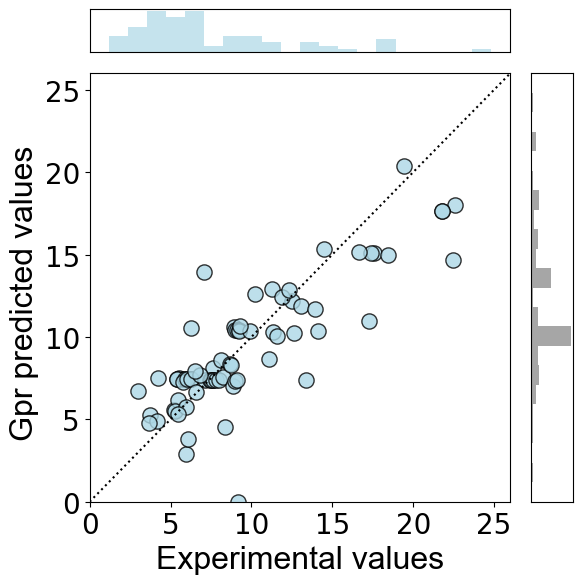

In [24]:

font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 23,
}

fig = plt.figure(figsize=[6,6])
ax1 = plt.subplot()
ax1.plot([0, 26], [0, 26],"k:", )
ax1.set_ylabel("Gpr predicted values ",font2)
ax1.set_xlabel("Experimental values",font2)
ax1.set_ylim([0, 26])
ax1.set_xlim([0, 26])
# plt.title('CV=LOOV | R=0.44',fontsize=20)

plt.scatter(Y,ypre,marker='o',c='lightblue',s=120,edgecolors='k',alpha=0.8,)



# Create histograms for x-dimension source and target data on the top side
ax_top = ax1.inset_axes([0, 1.05, 1, 0.1])
ax_top.hist(Y, bins=20, color='lightblue', alpha=0.7, density=True)
ax_top.set_xticks([])
ax_top.set_yticks([])

# Create histograms for y-dimension source and target data on the right side
ax_right = ax1.inset_axes([1.05, 0, 0.1, 1])
ax_right.hist(ypre, bins=20, orientation='horizontal', color='grey', alpha=0.7, density=True)
ax_right.set_xticks([])
ax_right.set_yticks([])

ax1.set_xticks(np.arange(0, 26, 5)) 
ax1.set_yticks(np.arange(0, 26, 5))
plt.tick_params(labelsize=20)
plt.tight_layout()
plt.savefig('tcgprres.png', dpi=800)
plt.savefig('tcgprres.svg', dpi=800)